In [127]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")

In [128]:
nyc_crime_raw = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv')

In [129]:
nyc_crime_raw.head(5)

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [130]:
#Looks like there was descriptive text at the top of the file and the actual columns are seen in row 3 above.
#First rename the columns

nyc_crime_raw.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 
                     'AggravatedAssault', 'PropertyCrime', 'Burglary', 'LarcenyTheft', 'MotorVehicleTheft',
                    'Arson']

In [131]:
#Confirm the new columns are persisted

nyc_crime_raw.head(5)

,City,Population,ViolentCrime,Murder,Rape1,Rape2,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,MotorVehicleTheft,Arson
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [132]:
#Now drop superfluous rows

nyc_crime = nyc_crime_raw.iloc[4:]

In [133]:
#Confirm row drop worked

nyc_crime.head(5)

,City,Population,ViolentCrime,Murder,Rape1,Rape2,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,MotorVehicleTheft,Arson
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [134]:
#Describe the DataFrame

nyc_crime.describe()

,City,Population,ViolentCrime,Murder,Rape1,Rape2,Robbery,AggravatedAssault,PropertyCrime,Burglary,LarcenyTheft,MotorVehicleTheft,Arson
count,351,348,348,348,0.000,348,348,348,348,348,348,348,187
unique,351,347,82,14,0.000,26,51,69,239,124,232,51,13
top,Guilderland Town,"9,517",0,0,nan,0,0,0,0,0,0,0,0
freq,1,2,51,299,nan,204,139,66,6,21,7,93,133


In [135]:
nyc_crime.shape

(351, 13)

In [136]:
#Now that we know we have 351 observations across 13 columns, let's Find NaN's by column

missing_values_count = nyc_crime.isnull().sum()
print(missing_values_count)

City                   0
Population             3
ViolentCrime           3
Murder                 3
Rape1                351
Rape2                  3
Robbery                3
AggravatedAssault      3
PropertyCrime          3
Burglary               3
LarcenyTheft           3
MotorVehicleTheft      3
Arson                164
dtype: int64


In [137]:
#Drop NaN's in the columns we care most about

nyc_crime = nyc_crime.dropna(subset=['Population', 'Murder', 'Robbery', 'PropertyCrime'])

In [138]:
#Rename 'Rape2' to just 'Rape'

#Disable warning when making changes on a slice of original dataframe
pd.options.mode.chained_assignment = None

nyc_crime.rename(columns={'Rape2': 'Rape'}, inplace=True)

In [139]:
#Drop Rape1 since it contains no data

nyc_crime.drop(columns=['Rape1'], inplace=True)

### Now that data is clean, begin creating/converting features for Population Squared, Murder and Robbery

In [140]:
#To create population squared feature, first remove commas from amounts
nyc_crime['Population'] = nyc_crime['Population'].str.replace(',', '')

In [141]:
#Next, convert column from string to int

nyc_crime['Population'] = nyc_crime['Population'].astype(int)

In [142]:
#Now we can create our new feature!

nyc_crime['PopulationSquared'] = nyc_crime['Population']**2

In [143]:
#Confirm this worked

nyc_crime[['Population', 'PopulationSquared']].head(5)

,Population,PopulationSquared
4,1861,3463321
5,2577,6640929
6,2846,8099716
7,97956,9595377936
8,6388,40806544


In [144]:
#To convert 'Murder' column, first need to convert from string to int

nyc_crime['Murder'] = nyc_crime['Murder'].astype(int)

In [145]:
#Now lets change our 'Murder' column to categorical (0 or 1)

nyc_crime['Murder'] = np.where((nyc_crime['Murder'] > 0), 1, 0)

In [146]:
#To create converted 'Robbery' column, need to remove commas first

nyc_crime['Robbery'] = nyc_crime['Robbery'].str.replace(',', '')

In [147]:
#Similarly to population and murder, to convert 'Robbery' column, first need to convert from string to int

nyc_crime['Robbery'] = nyc_crime['Robbery'].astype(int)

In [148]:
#Now lets change our 'Robbery' column to categorical (0 or 1)

nyc_crime['Robbery'] = np.where((nyc_crime['Robbery'] > 0), 1, 0)

In [149]:
#Finally, remove commas in property crime

nyc_crime['PropertyCrime'] = nyc_crime['PropertyCrime'].str.replace(',', '')

In [150]:
#Change property crime from string to int
nyc_crime['PropertyCrime'] = nyc_crime['PropertyCrime'].astype(int)

### Now that features are prepared, let's create our regression model

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

In [151]:
#First, let's describe our columns of interest to see if we need to remove outliers

print(nyc_crime['PropertyCrime'].describe())
print(nyc_crime['Population'].describe())
print(nyc_crime['PopulationSquared'].describe())

count      348.000
mean       792.606
std       7659.725
min          0.000
25%         40.500
50%        112.500
75%        341.000
max     141971.000
Name: PropertyCrime, dtype: float64
count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: Population, dtype: float64
count              348.000
mean      203554650960.236
std      3778875542708.130
min             276676.000
25%            9018117.000
50%           52325684.500
75%          339753567.000
max     70494931807876.000
Name: PopulationSquared, dtype: float64


### Based on the describe method above, let's eliminate outliers/skewness from our independent variables

**Start with Property Crime**

In [152]:
#Beginning with Property Crime, remove all data less than 25th percentile

nyc_crime = nyc_crime[nyc_crime['PropertyCrime'] > 40.5]

In [153]:
#Property Crime has a max of 141,971 which is an outlier. Let's see this column at 0.95

nyc_crime['PropertyCrime'].quantile(0.95)

1990.0

In [154]:
#Adjust our dataframe again, this time taking everything under 1990

nyc_crime = nyc_crime[nyc_crime['PropertyCrime'] < 1990]

#Confirm these changes worked
nyc_crime['PropertyCrime'].describe()

count    247.000
mean     312.680
std      335.846
min       41.000
25%       87.500
50%      180.000
75%      400.000
max     1985.000
Name: PropertyCrime, dtype: float64

**Now Population**

In [155]:
#Remove all data less than 25th percentile

nyc_crime = nyc_crime[nyc_crime['Population'] > 3003]

In [156]:
#Population has a max of 8,396,126 which is an outlier. Let's see this column at 0.95

nyc_crime['Population'].quantile(0.95)

44856.69999999998

In [157]:
#Adjust our dataframe again, this time taking everything under 1990

nyc_crime = nyc_crime[nyc_crime['Population'] < 68071]

#Confirm these changes worked
nyc_crime['Population'].describe()

count     216.000
mean    15800.958
std     12282.260
min      3012.000
25%      6558.250
50%     11079.500
75%     22221.750
max     58082.000
Name: Population, dtype: float64

**Finally, Population Squared**

In [158]:
#Overwrite current column based on changes to Population

nyc_crime['PopulationSquared'] = nyc_crime['Population']**2

In [159]:
# Instantiate and fit our model.
regression = linear_model.LinearRegression()
Y = nyc_crime['PropertyCrime']
X = nyc_crime[['Population', 'PopulationSquared', 'Murder', 'Robbery']]
regression.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regression.coef_)
print('\nIntercept: \n', regression.intercept_)
print('\nR-squared:')
print(regression.score(X, Y))


Coefficients: 
 [1.26449772e-02 1.04781917e-07 1.09923931e+02 1.09804439e+02]

Intercept: 
 -20.940904908586276

R-squared:
0.6303640844881786


### Working through assumptions

**Assumption One:** Linear Relationship with all variables

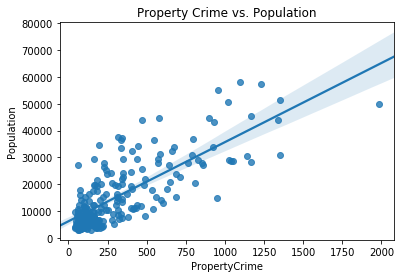

In [160]:
#Now test if Population is linear

sns.regplot(x='PropertyCrime', y='Population', data=nyc_crime)
plt.title('Property Crime vs. Population')
plt.show()

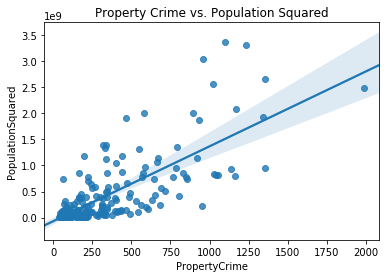

In [161]:
#Test if Population Squared is linear

sns.regplot(x='PropertyCrime', y='PopulationSquared', data=nyc_crime)
plt.title('Property Crime vs. Population Squared')
plt.show()

**Assumption Two:** Multivariate Normality

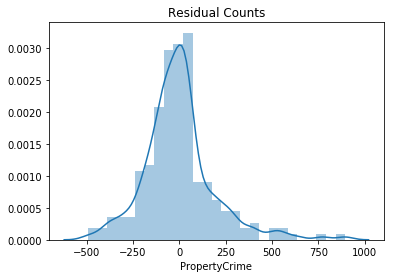

In [162]:
# Extract predicted values.
predicted = regression.predict(X).ravel()
actual = nyc_crime['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

sns.distplot(residual)
plt.title('Residual Counts')
plt.show()

**Assumption Three:** Homoscedasticity

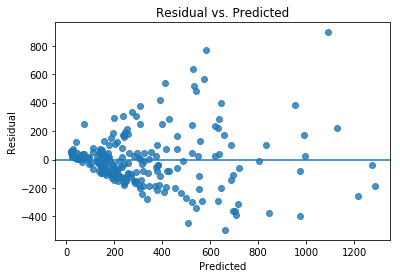

In [163]:
#Plotting residual vs. predicted

sns.regplot(x=predicted, y=residual, fit_reg=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [164]:
#Let's try to fix the heteroscedasticity seen above. First, we will take the log of Property Crime

nyc_crime['PropertyCrime'] = np.log(nyc_crime['PropertyCrime'])

# Instantiate and fit our model.
regression = linear_model.LinearRegression()
Y = nyc_crime['PropertyCrime']
X = nyc_crime[['Population', 'PopulationSquared', 'Murder', 'Robbery']]
regression.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regression.coef_)
print('\nIntercept: \n', regression.intercept_)
print('\nR-squared:')
print(regression.score(X, Y))

# Extract predicted values.
predicted = regression.predict(X).ravel()
actual = nyc_crime['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted


Coefficients: 
 [ 7.37058593e-05 -6.00411693e-10  2.24008791e-01  6.27301228e-01]

Intercept: 
 3.918127272076961

R-squared:
0.6422998779130196


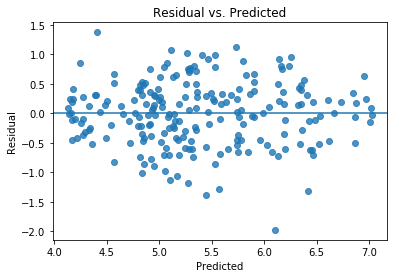

In [165]:
#Test for Homoscedasticity again

#Plotting residual vs. predicted

sns.regplot(x=predicted, y=residual, fit_reg=False)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

**Assumption Four:** Low Multicollinearity

In [166]:
#Correlation matrix

correlation_matrix = X.corr()
display(correlation_matrix)

,Population,PopulationSquared,Murder,Robbery
Population,1.000,0.953,0.424,0.293
PopulationSquared,0.953,1.000,0.442,0.236
Murder,0.424,0.442,1.000,0.195
Robbery,0.293,0.236,0.195,1.000


### Try Evaluating parameters using statsmodels

In [168]:
# Write out the model formula.
# Your dependent variable on the left, independent variables on the right
# Use a ~ to represent an '=' from the functional form

linear_formula = 'PropertyCrime ~ Population+PopulationSquared+Murder+Robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=nyc_crime).fit()

In [173]:
#Get R^2
lm.rsquared

0.6422998779130196

In [169]:
#Get coefficients
lm.params

Intercept            3.918
Population           0.000
PopulationSquared   -0.000
Murder               0.224
Robbery              0.627
dtype: float64

In [170]:
#Get p-values
lm.pvalues

Intercept           0.000
Population          0.000
PopulationSquared   0.004
Murder              0.047
Robbery             0.000
dtype: float64

In [172]:
#Get confidence intervals
lm.conf_int()

,0,1
Intercept,3.708,4.129
Population,0.000,0.000
PopulationSquared,-0.000,-0.000
Murder,0.003,0.445
Robbery,0.434,0.821
